In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
import openweathermapy.core as owm

from api_keys import api_key
settings = {"units": "imperial", "appid": api_key}

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_data = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city_data not in cities:
        cities.append(city_data)

# Print the city count to confirm sufficient count
len(cities)

630

In [24]:
weather_data = []

print("Beginning Data Retrieval")
print("---------------------------------")
counter = 1
set_counter = 1 
for city in cities:
    try:
        data = owm.get_current("{},{}".format(city.city_name, city.country_code), **settings)
        Cityname = city.city_name
        Cloudiness = data['clouds']['all']
        Country = data['sys']['country']
        Date = data['dt']
        Humidity = data['main']['humidity']
        Lat = data['coord']['lat']
        Lng = data['coord']['lon']
        Max_Temp = data['main']['temp_max']
        Wind_Speed = data['wind']['speed']
        if counter <= 50:
            print("Processing Record {} of Set {} | {}".format(counter, set_counter, Cityname))
            counter += 1
        else:
            counter = 1
            set_counter += 1 
            print("Processing Record {} of Set {} | {}".format(counter, set_counter, Cityname))
        weather_data.append({'City': Cityname, 'Cloudiness': Cloudiness, 'Country': Country, "Date": Date, "Humidity": Humidity, "Lat": Lat, "Lng": Lng, "Max Temp": Max_Temp, "Wind Speed": Wind_Speed})
    except:
        print("City not found. Skipping...")
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")
    
#    
    

Beginning Data Retrieval
---------------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | helong
Processing Record 3 of Set 1 | desaguadero
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | busselton
City not found. Skipping...
City not found. Skipping...
Processing Record 7 of Set 1 | tiarei
Processing Record 8 of Set 1 | yumen
Processing Record 9 of Set 1 | khromtau
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | guerrero negro
City not found. Skipping...
Processing Record 15 of Set 1 | antofagasta
Processing Record 16 of Set 1 | flin flon
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | ponta do sol
Processing Record 20 of Set 1 | priolo 

Processing Record 32 of Set 4 | sioux lookout
Processing Record 33 of Set 4 | tommot
Processing Record 34 of Set 4 | kenai
City not found. Skipping...
Processing Record 35 of Set 4 | awjilah
City not found. Skipping...
Processing Record 36 of Set 4 | lyuban
Processing Record 37 of Set 4 | riyadh
Processing Record 38 of Set 4 | praia da vitoria
Processing Record 39 of Set 4 | esperance
Processing Record 40 of Set 4 | mahebourg
City not found. Skipping...
Processing Record 41 of Set 4 | upernavik
Processing Record 42 of Set 4 | husavik
Processing Record 43 of Set 4 | porto walter
Processing Record 44 of Set 4 | jogeva
Processing Record 45 of Set 4 | alekseyevsk
Processing Record 46 of Set 4 | chavakkad
Processing Record 47 of Set 4 | mount gambier
City not found. Skipping...
Processing Record 48 of Set 4 | qaanaaq
City not found. Skipping...
Processing Record 49 of Set 4 | antsohihy
Processing Record 50 of Set 4 | bom jesus
Processing Record 1 of Set 5 | suntar
Processing Record 1 of Set

Processing Record 6 of Set 8 | lodja
Processing Record 7 of Set 8 | chilca
Processing Record 8 of Set 8 | kawambwa
Processing Record 9 of Set 8 | north bay
Processing Record 10 of Set 8 | hollins
Processing Record 11 of Set 8 | chegdomyn
Processing Record 12 of Set 8 | jackson
Processing Record 13 of Set 8 | zheleznodorozhnyy
Processing Record 14 of Set 8 | melita
Processing Record 15 of Set 8 | genteng
Processing Record 16 of Set 8 | sobolevo
Processing Record 17 of Set 8 | seryshevo
City not found. Skipping...
Processing Record 18 of Set 8 | carnarvon
Processing Record 19 of Set 8 | raudeberg
Processing Record 20 of Set 8 | nampula
Processing Record 21 of Set 8 | margate
Processing Record 22 of Set 8 | tuatapere
City not found. Skipping...
Processing Record 23 of Set 8 | kabinda
Processing Record 24 of Set 8 | nanortalik
Processing Record 25 of Set 8 | mattru
Processing Record 26 of Set 8 | yanam
City not found. Skipping...
Processing Record 27 of Set 8 | shingu
Processing Record 28 

Processing Record 34 of Set 11 | itarema
Processing Record 35 of Set 11 | murgab
Processing Record 36 of Set 11 | senador jose porfirio
Processing Record 37 of Set 11 | nkoteng
Processing Record 38 of Set 11 | riachao do jacuipe
Processing Record 39 of Set 11 | vaitape
Processing Record 40 of Set 11 | ostrovnoy
Processing Record 41 of Set 11 | opuwo
Processing Record 42 of Set 11 | srandakan
City not found. Skipping...
------------------------------
Data Retrieval Complete
------------------------------


In [25]:
pd.DataFrame(weather_data).count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [26]:
City_weather_df = pd.DataFrame(weather_data)
City_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,0,AR,1552485600,70,-54.81,-68.31,48.20,3.49
1,helong,20,CN,1552488721,73,25.94,116.13,55.01,4.27
2,desaguadero,20,PE,1552488722,64,-16.56,-69.04,55.42,2.71
3,cape town,20,ZA,1552488373,53,-33.93,18.42,77.00,10.29
4,punta arenas,75,CL,1552488188,76,-53.16,-70.91,51.80,13.87


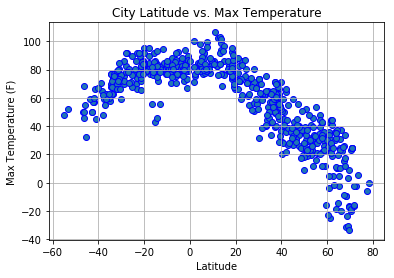

In [27]:
plt.scatter(City_weather_df['Lat'], City_weather_df['Max Temp'], marker='o', edgecolors= 'b')
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

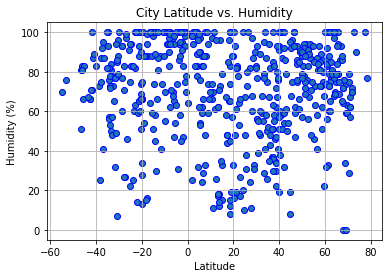

In [28]:
plt.scatter(City_weather_df['Lat'], City_weather_df['Humidity'], marker='o', edgecolors= 'b')
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

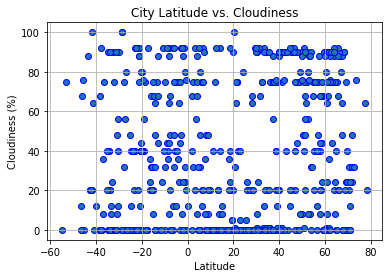

In [29]:
plt.scatter(City_weather_df['Lat'], City_weather_df['Cloudiness'], marker='o', edgecolors= 'b')
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

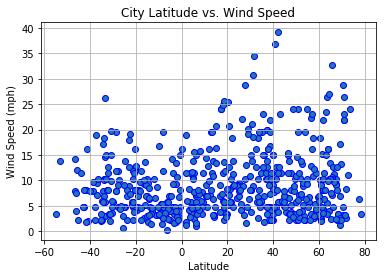

In [30]:
plt.scatter(City_weather_df['Lat'], City_weather_df['Wind Speed'], marker='o', edgecolors= 'b')
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

In [17]:
# data

In [16]:
# City_weather_df['Wind Speed'].value_counts()